Sequence Importance in Conversions


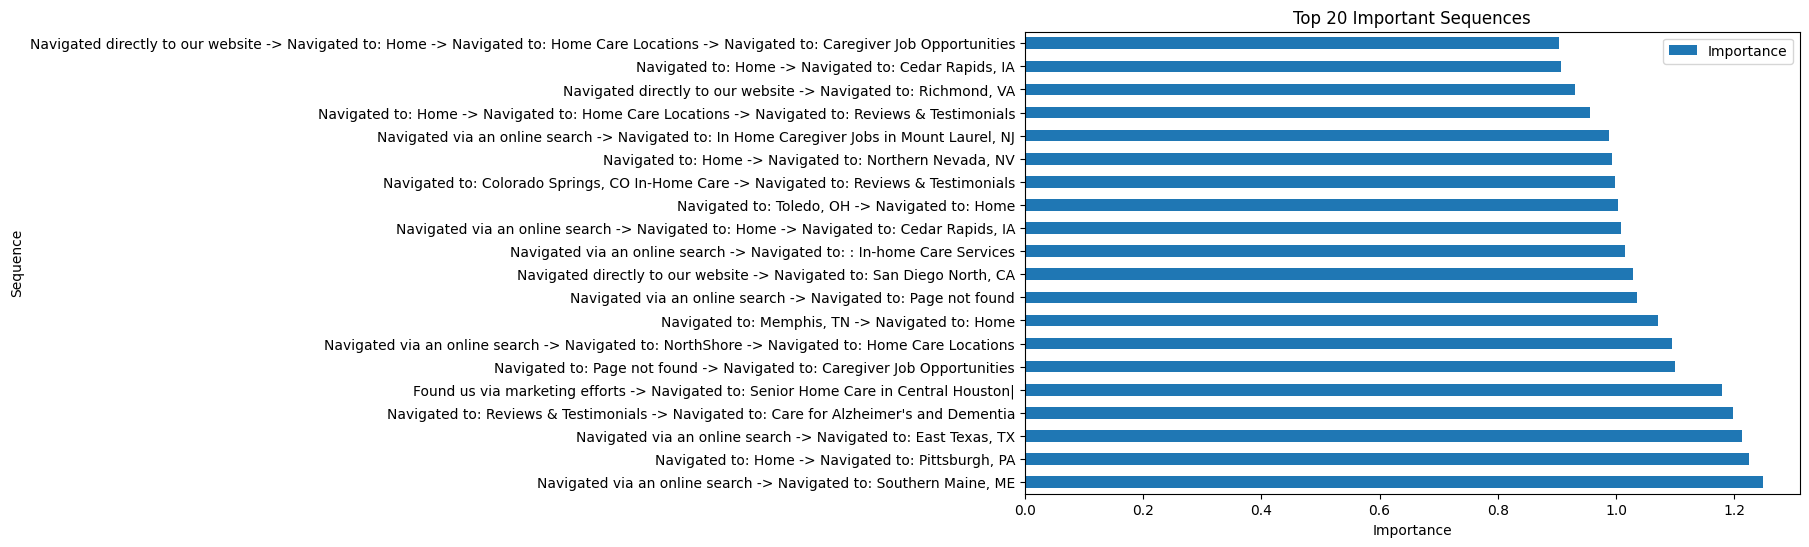

Sequence patterns for non-converting users that are similar to or unique from converting users
Top Similar Non-Converters Sequences:
1. Count: 301, Sequence: Navigated via an online search -> Navigated to: Home

266. Count: 252, Sequence: Navigated to: Home -> Navigated to: Home Care Locations

74. Count: 214, Sequence: Navigated via an online search -> Navigated to: Home Care Locations

2. Count: 181, Sequence: Navigated via an online search -> Navigated to: Home -> Navigated to: Home Care Locations

417. Count: 132, Sequence: Navigated directly to our website -> Navigated to: Home

91. Count: 82, Sequence: Navigated via an online search -> Navigated to: Reviews & Testimonials

445. Count: 68, Sequence: Navigated directly to our website -> Navigated to: Home Care Locations

422. Count: 66, Sequence: Navigated directly to our website -> Navigated to: Home -> Navigated to: Home Care Locations

109. Count: 61, Sequence: Navigated via an online search -> Navigated to: Financial Care Coord

Processing pairs:   0%|          | 0/192870 [00:00<?, ?it/s]

In [1]:
import pandas as pd
from data import get_data
from feature import plot_important_features_prefixspan
from conversion import convertor_review, analyze_divergence

###################################################################
# Parameters
###################################################################

# BigQuery Table Name (GA4) - Replace with your own - <project_id>.<dataset>.events_*
table_name = "<project_id>.<dataset>.events_*"
# Number of days to look back
historical_days = 180
# Goal Event Name
goal_event = "contact_us"
# Conversion Page Title (Before any | or - characters)
conversion_page_title = "Thank You"
# Brand Name (regex pattern)
brand = "(Amada Senior Care|About Amada Senior Home Care)"
# Whether to balance each class
balanced = False

###################################################################
# Notes
###################################################################
# Place service_account.json in the same directory as this file
# The service account must have access to the BigQuery table

###################################################################
# Main
###################################################################
# Get Data
data = get_data(table_name, historical_days, goal_event, conversion_page_title, brand)

# Maybe Balance Data
if balanced:
    convertors = data[data.converted == 1].copy()
    non_convertors = data[data.converted == 0].sample(len(convertors)).copy()

    data = pd.concat([convertors, non_convertors], axis=0)
    data = data.reset_index(drop=True)


# Prefix Span: Graph of Sequence Importance
print('Sequence Importance in Conversions')
plot_important_features_prefixspan(data.copy(), top_n=20)

# Convertor Review: Sequence Patterns of Similarity and Anomalies in Non-Convertors that are clustered with Convertors
print('Sequence patterns for non-converting users that are similar to or unique from converting users')
convertor_review(data.copy(), top_n=10)

# Divergence: Sequence Patterns where Non-Convertors Diverge from Convertors
print('Top Sequences where non-converting users followed a path that diverged from converting users')
results_df = analyze_divergence(data.copy(), min_freq=5, top_n=10)

for i, row in results_df.head(15).iterrows():

    print(f"Conversion Sequence: {row['conversion_seq']}")
    print(f"Non-Conversion Sequence: {row['non_conversion_seq']}")
    print(f"Diversion Node: {row['diversion']}")
    print(f"Diversion Score: {round(row['divergence_score'], 2)} Percent Non-Converting Users: {row['pct_users']}")
    print()
